In [1]:
!pip install fbprophet

     |████████████████████████████████| 61kB 567kB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 739kB/s eta 0:00:01
     |████████████████████████████████| 16.2MB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 112kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 829kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 737kB 2.6MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/v/opt/anaconda3/envs/py38/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/gf/d7hwcpk91wn5jmc9q0hcyn7h0000gn/T/pip-install-50lu6x8y/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/gf/d7hwcpk91wn5jmc9q0hcyn7h0000gn/T/pip-install-50lu6x8y/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/gf/d7hwcpk91wn5jmc9q0hc

In [1]:
import pandas as pd

df = pd.read_excel('casos_n.xls').reset_index().rename(columns={1: 'new_cases', 'index': 'day'})
df['total_cases'] = df.new_cases.cumsum()

In [2]:
import datetime

def nday2datetime(nday):
    base_date = datetime.date(2020, 3, 2)
    return base_date + datetime.timedelta(days=nday)

df['ds'] = df.day.apply(nday2datetime)

In [3]:
prophet_df = df.drop(columns=['day', 'total_cases']).rename(columns={'new_cases': 'y'})

In [5]:
from fbprophet import Prophet

m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


In [6]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
53,2020-04-24
54,2020-04-25
55,2020-04-26
56,2020-04-27
57,2020-04-28


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
53,2020-04-24,551.100946,495.904227,603.305115
54,2020-04-25,592.880205,533.398364,643.234603
55,2020-04-26,594.867048,541.989948,645.064569
56,2020-04-27,616.608071,562.380514,672.796879
57,2020-04-28,620.348592,564.225784,671.274269


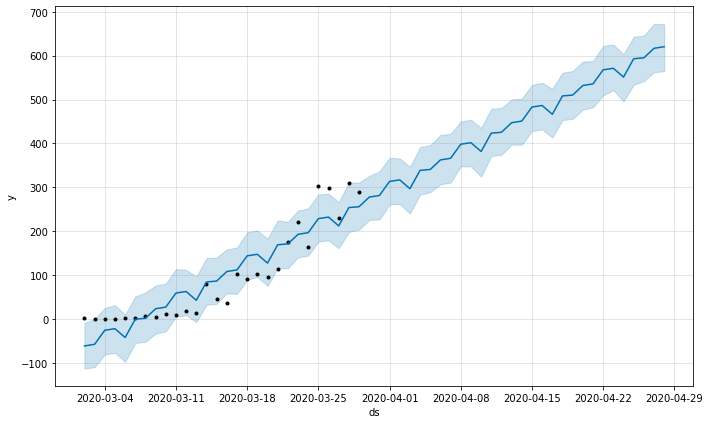

In [8]:
fig1 = m.plot(forecast)

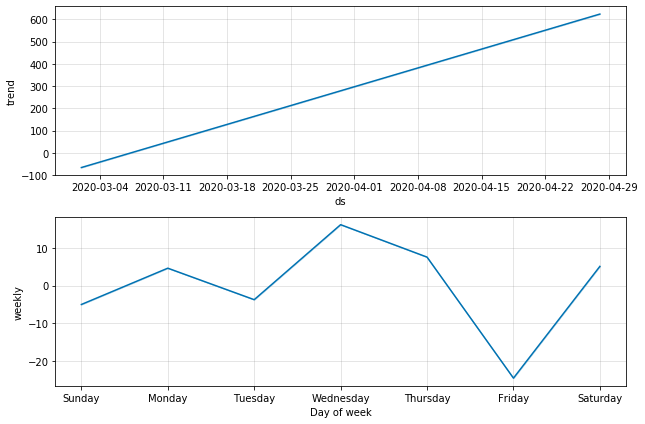

In [9]:
fig2 = m.plot_components(forecast)

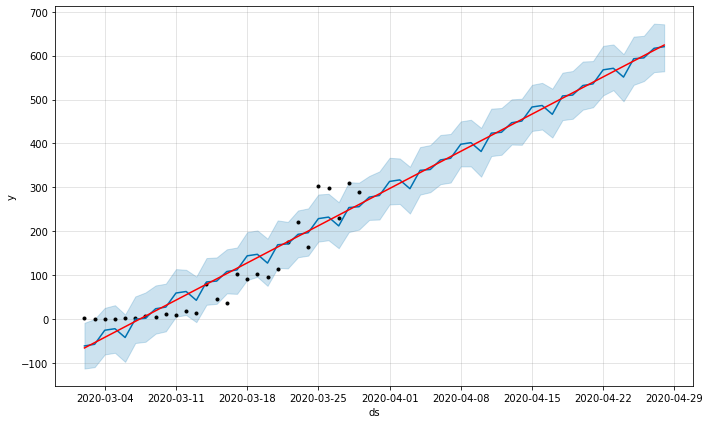

In [10]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [14]:
m.plot()

TypeError: plot() missing 1 required positional argument: 'fcst'